In [15]:
!pip install seaborn scikit-learn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

In [16]:
df = pd.read_csv("synthetic_SAC_electronic_dataset.csv")
X = df.drop("overpotential", axis=1)
y = df["overpotential"]
print("Dataset shape:", df.shape)
df.describe()

Dataset shape: (200, 21)


,electronic_feature_1,electronic_feature_2,electronic_feature_3,electronic_feature_4,electronic_feature_5,electronic_feature_6,electronic_feature_7,electronic_feature_8,electronic_feature_9,electronic_feature_10,...,electronic_feature_12,electronic_feature_13,electronic_feature_14,electronic_feature_15,electronic_feature_16,electronic_feature_17,electronic_feature_18,electronic_feature_19,electronic_feature_20,overpotential
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.118107,0.070502,-0.037622,-0.039981,-0.041669,-0.023906,-0.095751,0.049606,0.034415,0.124725,...,0.002344,0.040172,-0.001875,0.071443,0.060024,0.002095,-0.045304,0.095857,0.078436,0.056739
std,0.947236,1.042968,1.061102,0.976775,1.009479,1.014562,1.023642,0.961080,0.888671,1.030417,...,1.100523,0.990543,0.995014,1.060126,1.079111,0.981475,0.975206,0.961353,0.909686,2.050233
min,-2.499406,-2.896255,-3.241267,-2.390304,-3.019512,-2.532246,-2.696887,-2.991136,-2.650970,-2.316144,...,-2.940389,-2.906988,-2.198806,-2.929449,-2.591042,-2.635748,-2.832156,-2.604214,-2.872262,-5.317584
25%,-0.560505,-0.580119,-0.705359,-0.824742,-0.679842,-0.804024,-0.812197,-0.696975,-0.510822,-0.536207,...,-0.750615,-0.646181,-0.771787,-0.653336,-0.583048,-0.670177,-0.685226,-0.552580,-0.435979,-1.317246
50%,0.176456,0.016539,-0.028554,-0.045594,-0.058241,0.043514,-0.064299,0.030920,0.070268,0.024079,...,-0.031868,0.048915,0.024420,-0.018862,0.037928,-0.019075,-0.010375,0.129911,0.089929,0.091785
75%,0.700248,0.745732,0.634013,0.698653,0.627523,0.668974,0.557876,0.689014,0.668260,0.860472,...,0.755647,0.633819,0.710613,0.829423,0.731732,0.648027,0.472020,0.729682,0.638837,1.493128
max,2.526932,2.985259,3.152057,2.270693,2.426716,3.109919,2.949094,2.455300,2.056544,3.852731,...,2.558199,2.303639,2.601683,2.644343,3.926238,3.243093,3.137749,3.078881,2.720169,6.318165


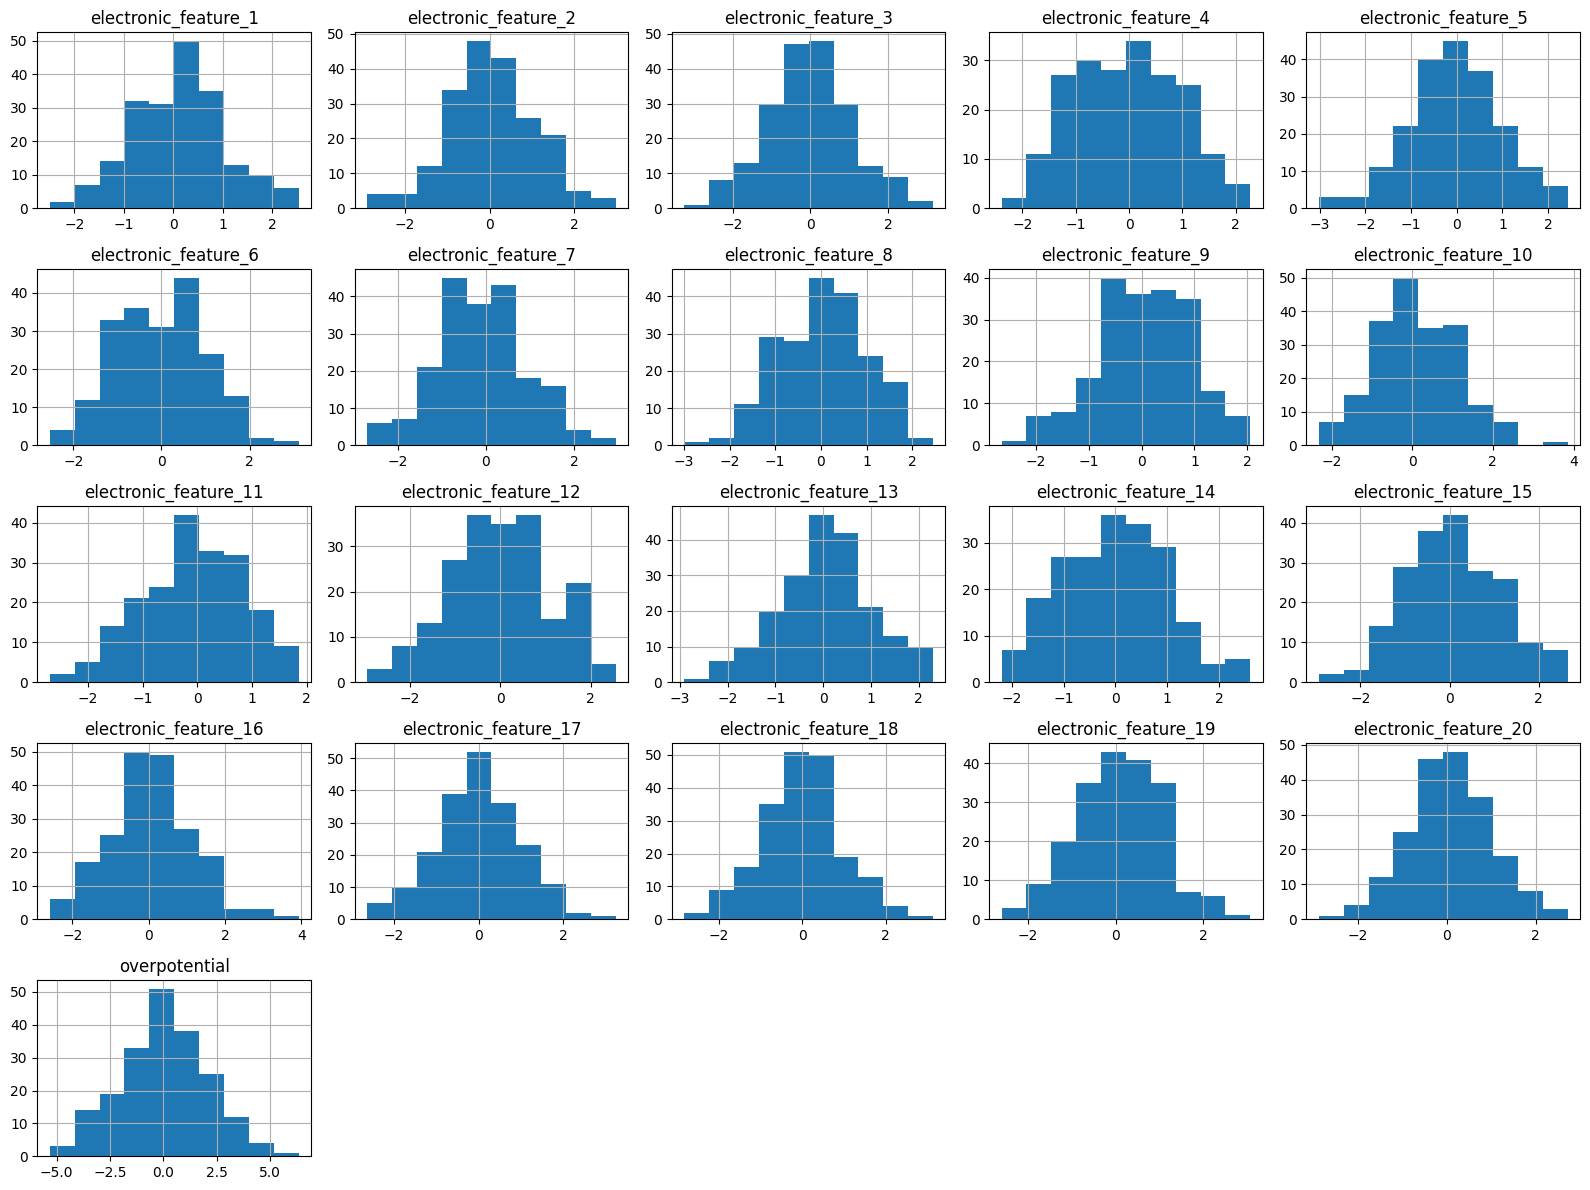

In [17]:
df.hist(figsize=(16, 12))
plt.tight_layout()
plt.show()

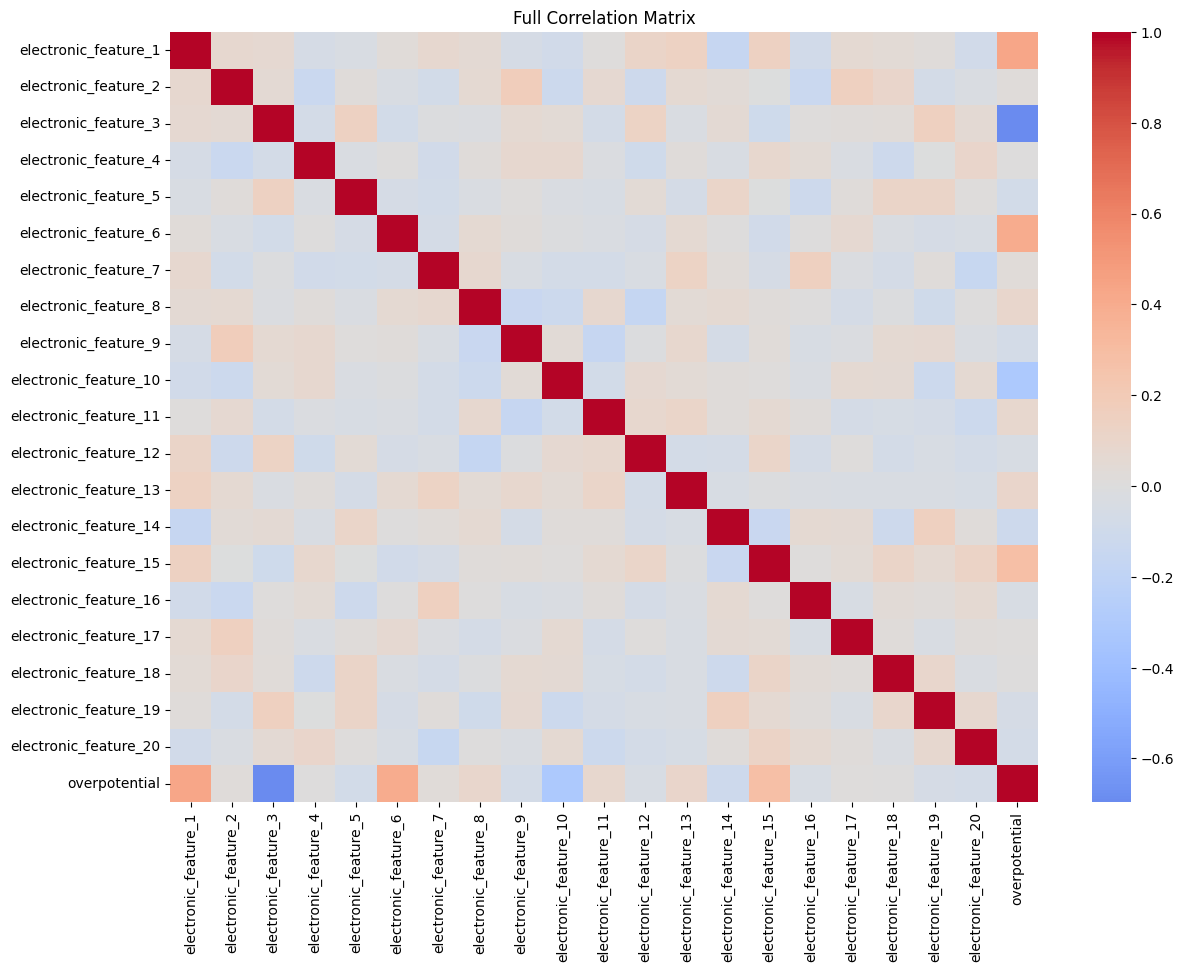

In [18]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Full Correlation Matrix")
plt.show()

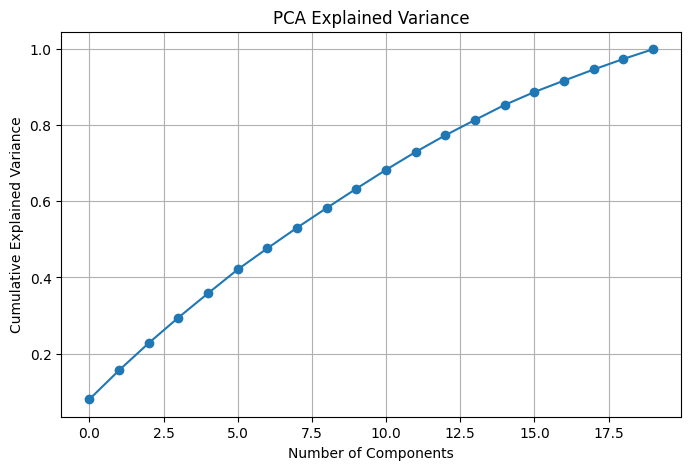

In [19]:
X = df.drop("overpotential", axis=1)
y = df["overpotential"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()

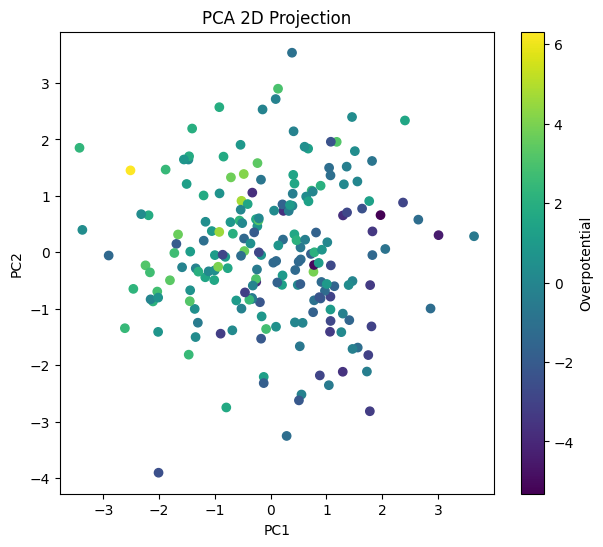

In [20]:
plt.figure(figsize=(7,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
plt.colorbar(label="Overpotential")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D Projection")
plt.show()

In [21]:
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print("Highly correlated features removed:", to_drop)

X_filtered = X.drop(columns=to_drop)
print("Remaining features after self-filtering:", X_filtered.shape[1])

Highly correlated features removed: []
Remaining features after self-filtering: 20


In [22]:
corr_target = df.corr()["overpotential"].abs().sort_values(ascending=False)
print(corr_target)

selected_features = corr_target[corr_target > 0.15].index
selected_features = selected_features.drop("overpotential")

print("Selected features after target filtering:", list(selected_features))

X_final = X_filtered[selected_features]
print("Final feature count:", X_final.shape[1])

overpotential            1.000000
electronic_feature_3     0.695605
electronic_feature_1     0.436170
electronic_feature_6     0.402725
electronic_feature_10    0.312853
electronic_feature_15    0.281898
electronic_feature_14    0.116417
electronic_feature_13    0.098944
electronic_feature_8     0.089126
electronic_feature_11    0.085908
electronic_feature_5     0.081363
electronic_feature_20    0.076146
electronic_feature_9     0.070923
electronic_feature_19    0.058381
electronic_feature_12    0.044814
electronic_feature_16    0.042766
electronic_feature_7     0.027397
electronic_feature_2     0.016959
electronic_feature_17    0.011277
electronic_feature_4     0.006066
electronic_feature_18    0.000113
Name: overpotential, dtype: float64
Selected features after target filtering: ['electronic_feature_3', 'electronic_feature_1', 'electronic_feature_6', 'electronic_feature_10', 'electronic_feature_15']
Final feature count: 5


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

scaler_final = StandardScaler()
X_train = scaler_final.fit_transform(X_train)
X_test = scaler_final.transform(X_test)

In [24]:
models = {
    "MLR": LinearRegression(),
    "RFR": RandomForestRegressor(n_estimators=200, random_state=42),
    "SVR": SVR(),
    "KNR": KNeighborsRegressor()
}

In [25]:
results = []

for name, model in models.items():

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results.append([
        name,
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred),
        np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(y_test, y_test_pred)),
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)
    ])

results_df = pd.DataFrame(results, columns=[
    "Model",
    "R2_train", "R2_test",
    "RMSE_train", "RMSE_test",
    "MAE_train", "MAE_test"
])

results_df

,Model,R2_train,R2_test,RMSE_train,RMSE_test,MAE_train,MAE_test
0,MLR,0.911066,0.936047,0.609218,0.518875,0.467780,0.391630
1,RFR,0.971408,0.787645,0.345429,0.945506,0.259945,0.669089
2,SVR,0.894168,0.787258,0.664581,0.946367,0.454888,0.617057
3,KNR,0.853601,0.810713,0.781641,0.892676,0.637620,0.638720


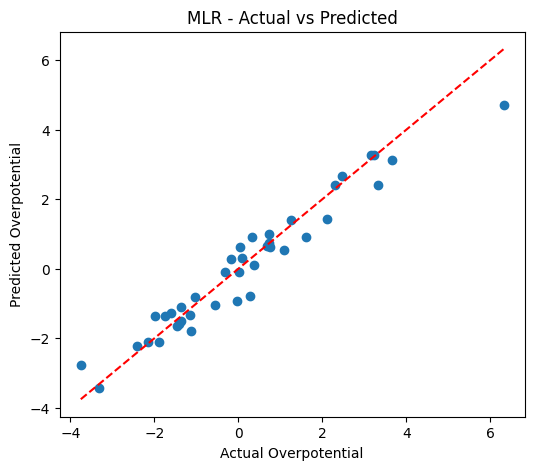

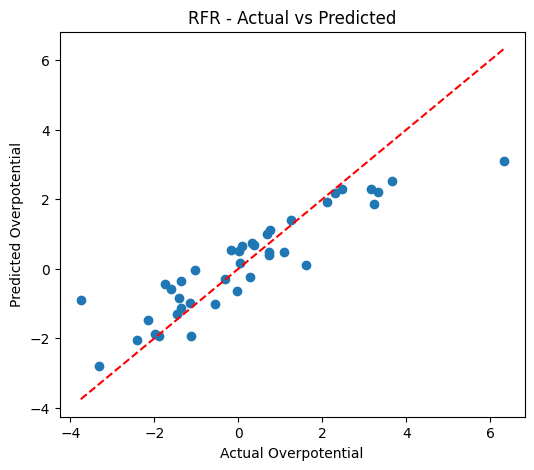

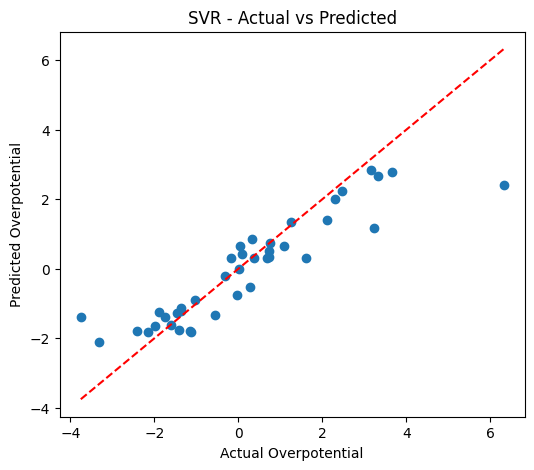

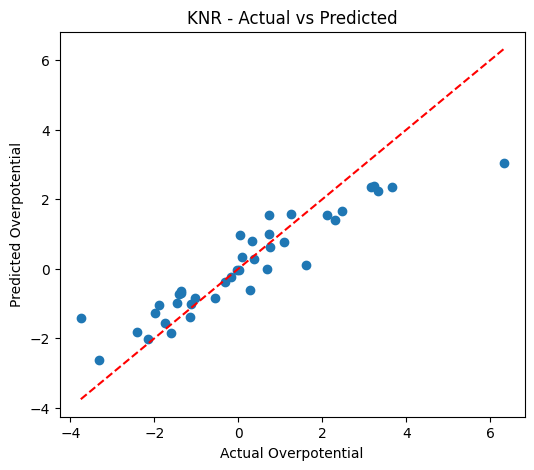

In [26]:
for name, model in models.items():

    y_test_pred = model.predict(X_test)

    plt.figure(figsize=(6,5))
    plt.scatter(y_test, y_test_pred)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--')

    plt.xlabel("Actual Overpotential")
    plt.ylabel("Predicted Overpotential")
    plt.title(f"{name} - Actual vs Predicted")
    plt.show()